## Sampling 2

In [3]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal
import numpy as np
%matplotlib inline
from IPython.display import Image

### Example
$ x(t) = 2 \cos \left( 2 \pi t + \frac{\pi}{4} \right) , \quad\quad -\infty < t < \infty$<br>
$ For {T}_{s} = 0.4, 0.5, 1 sec/sample$ is Nyquist sampling rate satisfied?

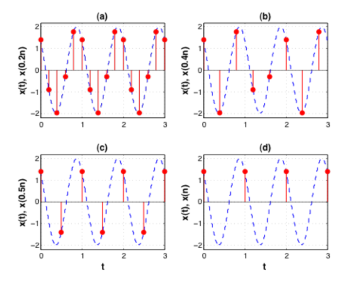

In [5]:
 Image("img/ex1-1.png")

In [6]:
def h(t, Ts):
    return np.sin( np.pi * t / Ts) / np.pi / (t / Ts)

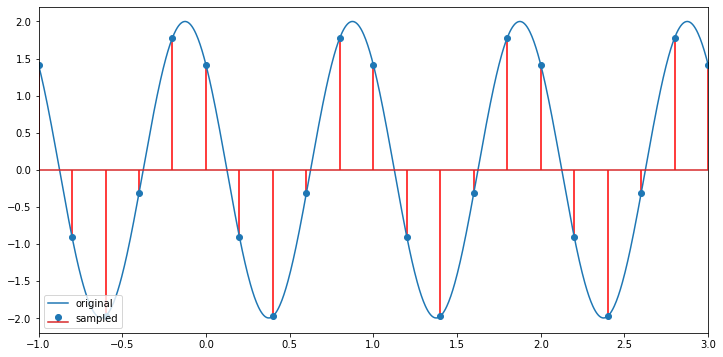

In [16]:
def ftn(t):
    return 2 * np.cos ( 2 * np.pi * t + np.pi / 4)

Ts = 0.2
t = np.linspace (-1, 3, 1000)
plt.figure(figsize=(12,6))
plt.plot(t, ftn(t), label = 'original')

xs = Ts * np.array( list(range(-500, 500)))
ys = ftn(xs)

plt.stem(xs, ys, 'ro-', label = "sampled")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=3)

In [21]:
def h(t, Ts):
    conds = [np.abs(t) < 2e-5, np.abs(t) > 1e-5]
    funds = [
        lambda x: 1,
        lambda x: np.sin(np.pi * x / Ts) / np.pi / (x / Ts)
    ]
    return np.piecewise(t, conds, funds)

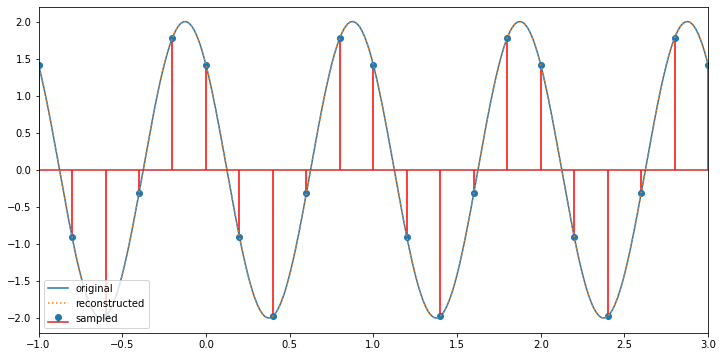

In [25]:
def ftn(t):
    return 2 * np.cos ( 2 * np.pi * t + np.pi / 4)

Ts = 0.2
t = np.linspace (-1, 3, 1000)
plt.figure(figsize=(12,6))
plt.plot(t, ftn(t), label = 'original')

xs = Ts * np.array( list(range(-500, 500)))
ys = ftn(xs)

plt.stem(xs, ys, 'ro-', label = "sampled")

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v,':', label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=3)

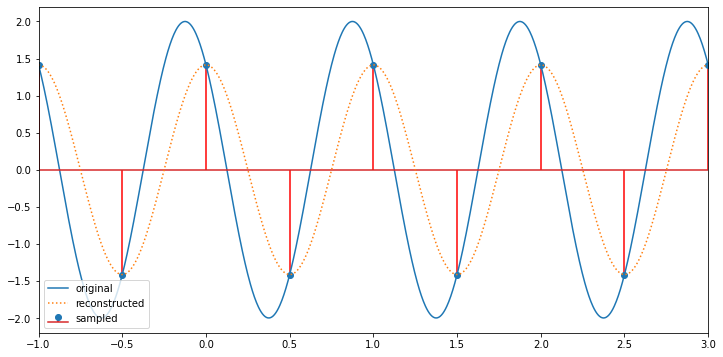

In [26]:
def ftn(t):
    return 2 * np.cos ( 2 * np.pi * t + np.pi / 4)

Ts = 0.5
t = np.linspace (-1, 3, 1000)
plt.figure(figsize=(12,6))
plt.plot(t, ftn(t), label = 'original')

xs = Ts * np.array( list(range(-500, 500)))
ys = ftn(xs)

plt.stem(xs, ys, 'ro-', label = "sampled")

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v,':', label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=3)

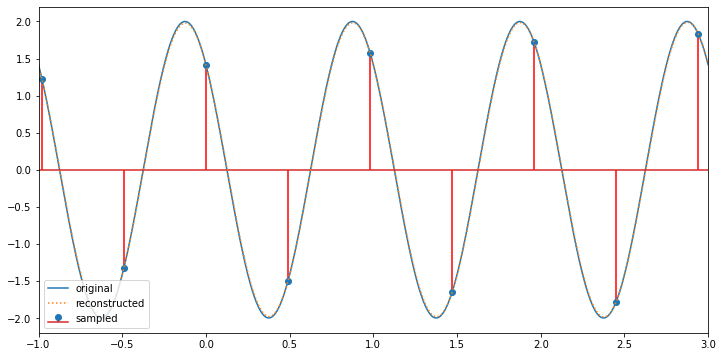

In [27]:
def ftn(t):
    return 2 * np.cos ( 2 * np.pi * t + np.pi / 4)

Ts = 0.49
t = np.linspace (-1, 3, 1000)
plt.figure(figsize=(12,6))
plt.plot(t, ftn(t), label = 'original')

xs = Ts * np.array( list(range(-500, 500)))
ys = ftn(xs)

plt.stem(xs, ys, 'ro-', label = "sampled")

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v,':', label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=3)

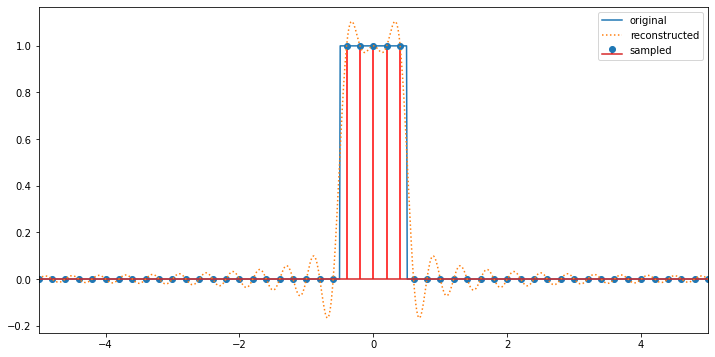

In [32]:
def ftn(t):
    return np.heaviside(t + 0.5,0) - np.heaviside(t - 0.5,0)

Ts = 0.2
t = np.linspace (-5, 5, 1000)
plt.figure(figsize=(12,6))
plt.plot(t, ftn(t), label = 'original')

xs = Ts * np.array( list(range(-500, 500)))
ys = ftn(xs)

plt.stem(xs, ys, 'ro-', label = "sampled")

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v,':', label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=1)

### Example
$ x_1(t) = u(t + 0.5) - u(t - 0.5)$<br>
If not, determine an approximate max - frequency

In [33]:
import scipy.integrate

In [34]:
scipy.integrate.quad( lambda x:x**2, 0, 1)[0]

0.33333333333333337

In [42]:
def hu(w):
    conds = [np.abs(w) < 2e-5, np.abs(w) > 1e-5]
    funds = [
        lambda w: 1,
        lambda w: (np.sin(w / 2 ) / (w / 2))**2
    ]
    return np.piecewise(w, conds, funds)

In [45]:
scipy.integrate.quad( hu, -70, 70)[0] / 2 / np.pi

0.9908073539074791

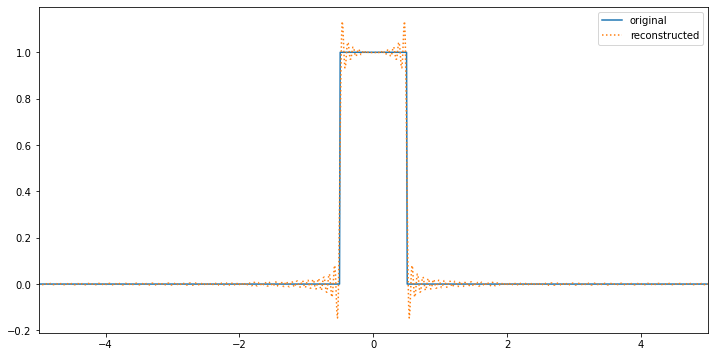

In [49]:
def ftn(t):
    return np.heaviside(t + 0.5,0) - np.heaviside(t - 0.5,0)

Ts = 0.04
t = np.linspace (-5, 5, 1000)
plt.figure(figsize=(12,6))
plt.plot(t, ftn(t), label = 'original')

# xs = Ts * np.array( list(range(-500, 500)))
# ys = ftn(xs)

# plt.stem(xs, ys, 'ro-', label = "sampled")

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v,':', label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=1)